### Kaggle Dataset Link
https://www.kaggle.com/rockinjas123/spam-ham-emails

In [6]:
import pandas as pd
import numpy as np
import seaborn as sb

In [21]:
df = pd.read_csv('datasets/emails.csv')

In [22]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [5]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

c:\users\crazy\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spam', ylabel='count'>

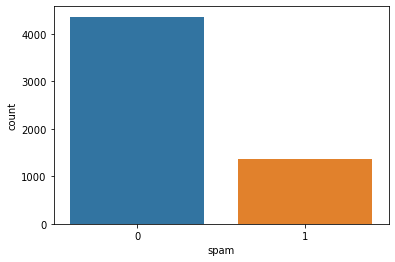

In [7]:
sb.countplot(df['spam'])

## Data Wrangling

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5723    False
5724    False
5725    False
5726    False
5727    False
Length: 5728, dtype: bool

In [11]:
df.duplicated().sum()

33

In [12]:
df['text'].duplicated().sum()

33

In [33]:
df['spam'].duplicated().sum()

5693

#### Handling duplicates values

In [30]:
df.drop_duplicates(inplace=True)

In [32]:
df.duplicated('text').sum()

0

In [31]:
df.duplicated('spam').sum()

5693

In [34]:
df.shape

(5695, 2)

In [35]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [36]:
df.isnull().sum()

text    0
spam    0
dtype: int64

#### Spliting the dataset

In [37]:
x = df.text.values
y = df.spam.values

In [42]:
# x,y

#### Text to countvectorizer

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
cv = CountVectorizer()
x_cv = cv.fit_transform(x)

In [46]:
x_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Data spliting to train test

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(x_cv,y, test_size = 0.25)

## Model Fit

#### Multinomial Naive Bias

In [49]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(xtrain, ytrain)

MultinomialNB()

In [51]:
model.score(xtest,ytest)

0.9901685393258427

#### Gaussian naive bias

In [66]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# gnb.fit(xtrain,ytrain)
# gnb.score(xtest.todense(),ytest)

#### Bernoulli Naive Bias

In [67]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(xtrain,ytrain)
bnb.score(xtest,ytest)

0.9866573033707865